This is my first time in a while looking at PSP/FIELDS data. And the first time doing it using Python. Let's see if I can find what I want in the file...

# Open file and extract PSD

In [51]:
from matplotlib import pyplot as plt
import numpy as np
from spacepy import pycdf

In [84]:
file = '..\\..\\data\\FIELDS\\psp_fld_l3_rfs_lfr_20250326_v00.cdf'

Load the cdf file in a variable

In [85]:
data = pycdf.CDF(file)

Check out all of the keys in this data file!

In [86]:
data.keys()

KeysView(<CDF:
component_index_position: CDF_INT4 [3] NRV
component_index_unit_vector: CDF_INT4 [3] NRV
component_label_ch0_GND_IAU_JUPITER: CDF_CHAR*13 [3] NRV
component_label_ch0_GND_J2000: CDF_CHAR*7 [3] NRV
component_label_ch0_GND_RTN: CDF_CHAR*5 [3] NRV
component_label_ch0_SCM_IAU_JUPITER: CDF_CHAR*13 [3] NRV
component_label_ch0_SCM_J2000: CDF_CHAR*7 [3] NRV
component_label_ch0_SCM_RTN: CDF_CHAR*5 [3] NRV
component_label_ch0_V1V2_IAU_JUPITER: CDF_CHAR*13 [3] NRV
component_label_ch0_V1V2_J2000: CDF_CHAR*7 [3] NRV
component_label_ch0_V1V2_RTN: CDF_CHAR*5 [3] NRV
component_label_ch0_V1V3_IAU_JUPITER: CDF_CHAR*13 [3] NRV
component_label_ch0_V1V3_J2000: CDF_CHAR*7 [3] NRV
component_label_ch0_V1V3_RTN: CDF_CHAR*5 [3] NRV
component_label_ch0_V1_IAU_JUPITER: CDF_CHAR*13 [3] NRV
component_label_ch0_V1_J2000: CDF_CHAR*7 [3] NRV
component_label_ch0_V1_RTN: CDF_CHAR*5 [3] NRV
component_label_ch0_V2V4_IAU_JUPITER: CDF_CHAR*13 [3] NRV
component_label_ch0_V2V4_J2000: CDF_CHAR*7 [3] NRV
component

How will I find what I'm looking for?

In [87]:
data.attrs

<gAttrList:
Acknowledgement: 
DOI: https://doi.org/TBD [CDF_CHAR]
Data_type: L3>Level 3 Data [CDF_CHAR]
Data_version: 03 [CDF_CHAR]
Dependencies: None [CDF_CHAR]
Descriptor: RFS_LFR>Radio Frequency Spectrometer LFR [CDF_CHAR]
Discipline: Solar Physics>Heliospheric Physics [CDF_CHAR]
            Space Physics>Interplanetary Studies [CDF_CHAR]
File_naming_convention: source_datatype_descriptor_yyyyMMdd [CDF_CHAR]
Generated_by: PSP FIELDS SOC [CDF_CHAR]
Generation_date: Fri Apr  4 13:21:23 2025 [CDF_CHAR]
HTTP_LINK: http://fields.ssl.berkeley.edu/data/ [CDF_CHAR]
Instrument_type: Radio and Plasma Waves (space) [CDF_CHAR]
                 Electric Fields (space) [CDF_CHAR]
                 Magnetic Fields (space) [CDF_CHAR]
LINK_TEXT: PSP/FIELDS SOC [CDF_CHAR]
LINK_TITLE: PSP/FIELDS RFS HFR and LFR data available at [CDF_CHAR]
Logical_file_id: psp_fld_l3_rfs_lfr_20250326_v00 [CDF_CHAR]
Logical_source: psp_fld_l3_rfs_lfr [CDF_CHAR]
Logical_source_description: PSP FIELDS RFS LFR Data [CDF_CH

That description was useful. I want the power spectral density and I now know the key's name for it. Let see:

In [88]:
psd = data['psp_fld_l3_rfs_lfr_PSD_SFU']
np.shape(psd)

(24543, 64)

In [89]:
psd.attrs

<zAttrList:
CATDESC: LFR Flux Density (Stokes I) data, from cross dipole measurements, normalized to 1 AU. [CDF_CHAR]
DEPEND_0: epoch_lfr_stokes [CDF_CHAR]
DEPEND_1: frequency_lfr_stokes [CDF_CHAR]
DISPLAY_TYPE: spectrogram [CDF_CHAR]
FIELDNAM: psp_fld_l3_rfs_lfr_PSD_SFU [CDF_CHAR]
FILLVAL: -1e+31 [CDF_REAL4]
FORMAT: E12.2 [CDF_CHAR]
LABLAXIS: LFR PSD SFU [CDF_CHAR]
SCALETYP: log [CDF_CHAR]
SI_conv: 1.0e-22>Watt/meter^2/Hz [CDF_CHAR]
UNITS: sfu [CDF_CHAR]
VALIDMAX: 1e+30 [CDF_REAL4]
VALIDMIN: 0.0 [CDF_REAL4]
VARIABLE_PURPOSE: SUMMARY,PRIMARY_VAR [CDF_CHAR]
VAR_NOTES: psp_fld_l3_rfs_lfr_PSD_FLUX, converted to sfu and normalized to a distance of 1 au, useful for multi-spacecraft investigation of angular dependence of radio emission from the Sun. Note that the normalization is a simple 1/r^2 scaling, neglecting the non-zero radial distance of the emission source region. [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]
>

Marvellous! This description tells me where to find the corresponding time and energy information

In [90]:
time = data['epoch_lfr_stokes']

Simple checks

In [91]:
np.shape(time)

(24543,)

In [92]:
time[0]

datetime.datetime(2025, 3, 26, 0, 0, 1, 667348)

In [93]:
time.attrs

<zAttrList:
CATDESC: Time for RFS Stokes parameter data. [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: epoch_lfr_stokes [CDF_CHAR]
FILLVAL: 9999-12-31 23:59:59.999999 [CDF_TIME_TT2000]
FORMAT: I22 [CDF_CHAR]
LABLAXIS: epoch [CDF_CHAR]
MONOTON: INCREASE [CDF_CHAR]
SCALEMAX: 9999-12-13 23:59:59.999999 [CDF_TIME_TT2000]
SCALEMIN: 9999-12-13 23:59:59.999999 [CDF_TIME_TT2000]
TIME_BASE: J2000 [CDF_CHAR]
UNITS: ns [CDF_CHAR]
VALIDMAX: 2050-01-01 00:00:00 [CDF_TIME_TT2000]
VALIDMIN: 2010-01-01 00:00:00 [CDF_TIME_TT2000]
VAR_TYPE: support_data [CDF_CHAR]
>

In [94]:
freq = data['frequency_lfr_stokes']

In [95]:
freq.attrs

<zAttrList:
CATDESC: Frequencies for LFR Stokes Parameters [CDF_CHAR]
DEPEND_0: epoch_lfr_stokes [CDF_CHAR]
FIELDNAM: frequency_lfr_stokes [CDF_CHAR]
FILLVAL: -1e+31 [CDF_REAL4]
FORMAT: E12.2 [CDF_CHAR]
LABLAXIS: Frequency [CDF_CHAR]
SCALETYP: log [CDF_CHAR]
SI_conv: 1.0>Hz [CDF_CHAR]
UNITS: Hz [CDF_CHAR]
VALIDMAX: 20000000.0 [CDF_REAL4]
VALIDMIN: 0.0 [CDF_REAL4]
VAR_TYPE: support_data [CDF_CHAR]
>

In [96]:
np.shape(freq)

(24543, 64)

Now I wonder, I expect the frequency bins are the same at all times but... is this true?

In [97]:
test = (freq[0]==freq[10])
test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [98]:
for i in range(len(freq)):
    test = freq[i]==freq[0]
    if np.isin('False',test)==True:
        print('different')

Well ok, now I'm convinced. Let's plot this spectrogram!

# Plot dynamic spectrum

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib import ticker

In [112]:
z = np.transpose(np.array(psd))
x, y = np.meshgrid(time, freq[0]/1e6)

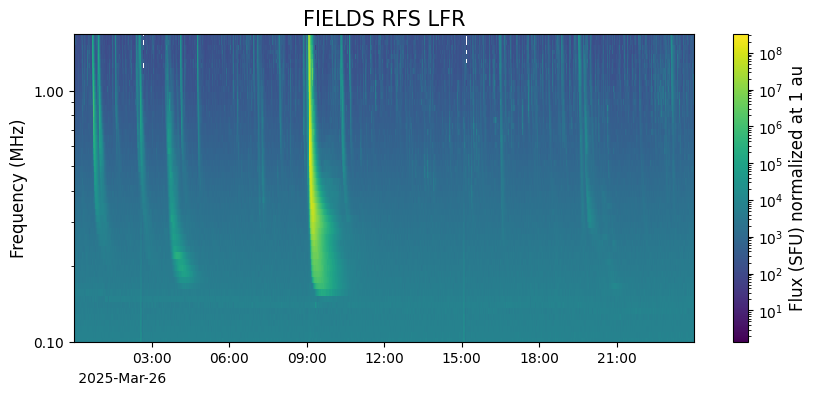

In [114]:
myFmt = mdates.DateFormatter('%H:%M') 
fig, ax = plt.subplots(1, 1, figsize = (10, 4))

c = ax.pcolormesh(x, y, z, norm=LogNorm())   
ax.set_title('FIELDS RFS LFR', fontsize = 15)

ax.xaxis.set_major_formatter(myFmt)
#ax.set_xlabel('Time (hour:minute)', fontsize = 12)
ax.set_xlabel(" {:s}".format(time[0].strftime("%Y-%b-%d")), loc="left")

ax.set_ylabel('Frequency (MHz)', fontsize = 12)

#set the limits of the plot to the limits of the data
#ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.axis([x.min(), x.max(), 0.1, y.max()])
ax.set_yscale('log')

cb = plt.colorbar(c)  #producing the colorbar
cb.set_label(label= 'Flux (SFU) normalized at 1 au', size = 12)

# scalar notation instead of scientific notation for labels on y axis
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

#plt.savefig('Dynamic_spectrum.pdf', bbox_inches='tight')
plt.show()

In [103]:
print(z.min())
print(z.max())

-798.3591
331539360.0
